## Q1. Import the required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q2.import csv file Diwali Sales Data.csv

In [39]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='latin-1')

## Q3. Find the shape of the data

In [9]:
df.shape

(11251, 15)

## Q4. Fetch the first five rows of the dataset

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Q5. Get the complete info of the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'

In [40]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


## Q7. Check for null values and find which columns have null values

In [14]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


## Q8. Calculate the mean value of Age, Orders and Amount by using describe function

In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Q9. Plot a bar chart for Gender and it's count

<Axes: xlabel='Gender', ylabel='count'>

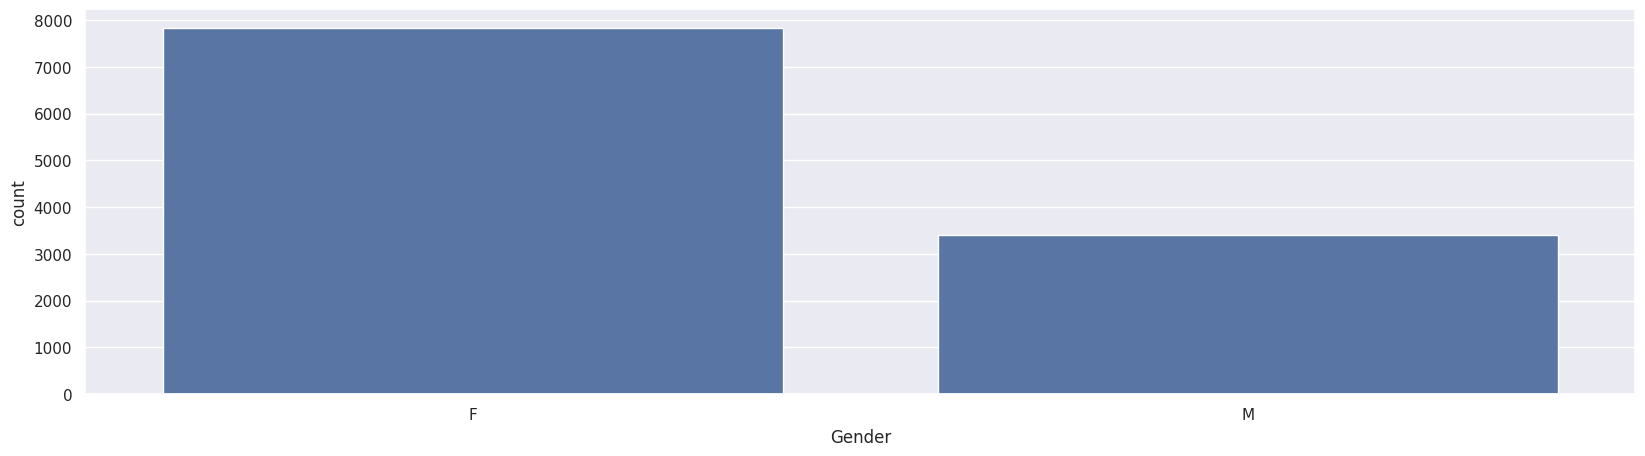

In [44]:

sns.countplot(x = 'Gender',data = df)

## Q10. Plot a bar chart for gender vs total amount

<ipython-input-56-3d63df87d850>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_state, color='green', palette='viridis')


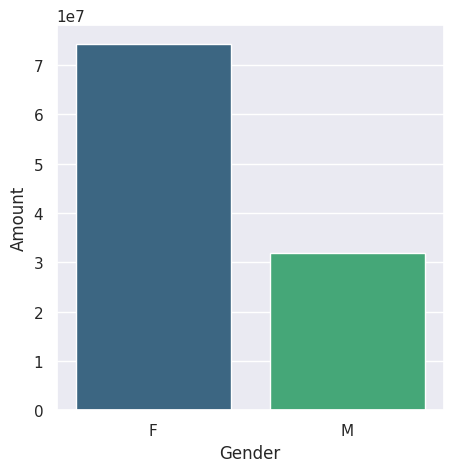

In [56]:

sales_state = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(5, 5))
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_state, color='green', palette='viridis')
plt.show()

## Q11. Plot the countplot for Age Group with hue and Gender

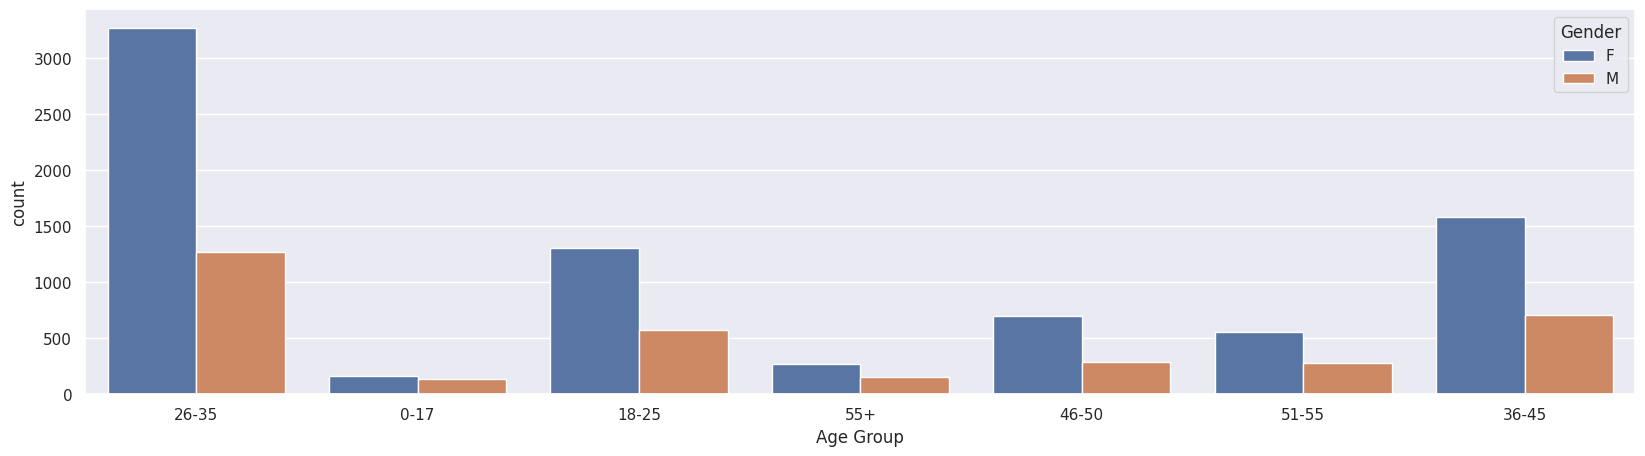

In [55]:

sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.show()

## Q12. Draw the plot for total number of orders from top 10 states

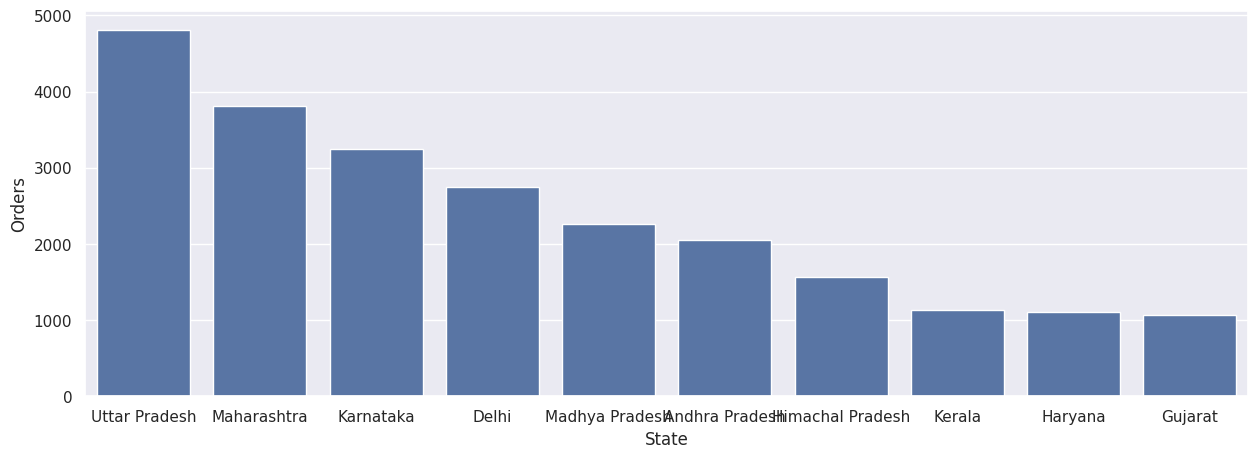

In [19]:

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.show()

## Q13.Draw the plot to plot total amount/sales from top 10 states

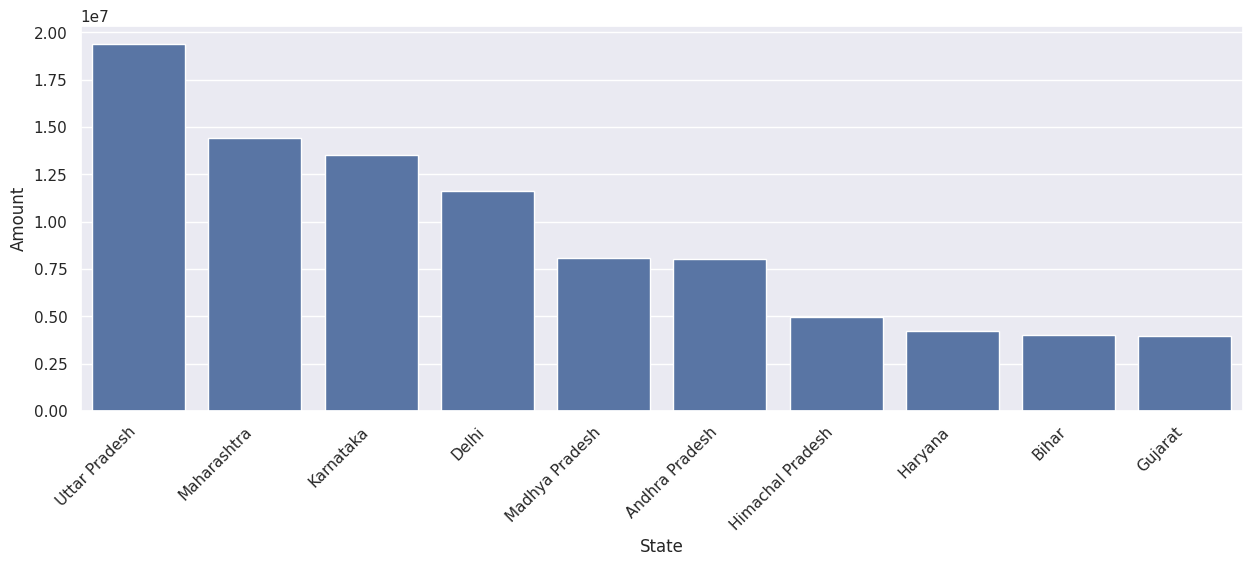

In [57]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

## Q14. Draw the plot to show the marital status

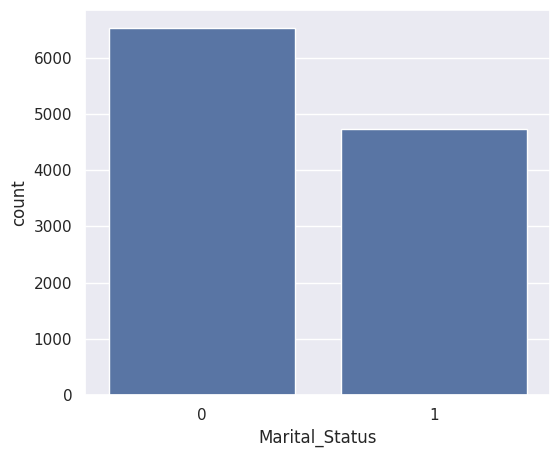

In [21]:


sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(data = df, x = 'Marital_Status')
plt.show()

## Q15. Draw the plot to show the top 10 occupations

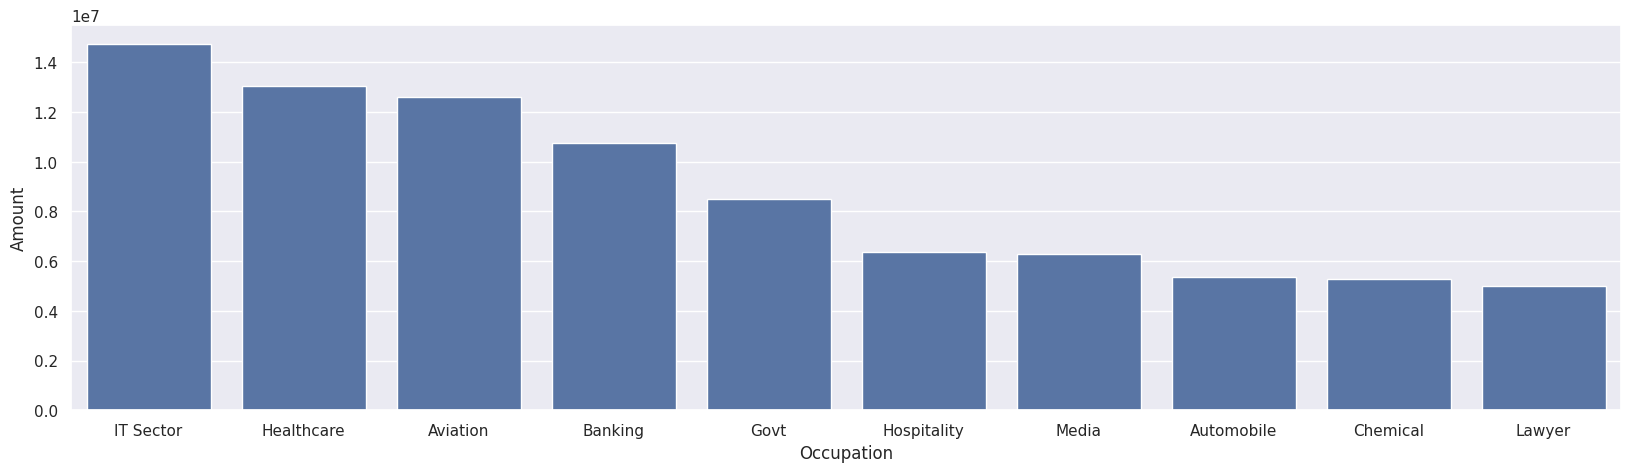

In [23]:


sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.show()

## Q16. Draw the countplot to print the top 10 categories

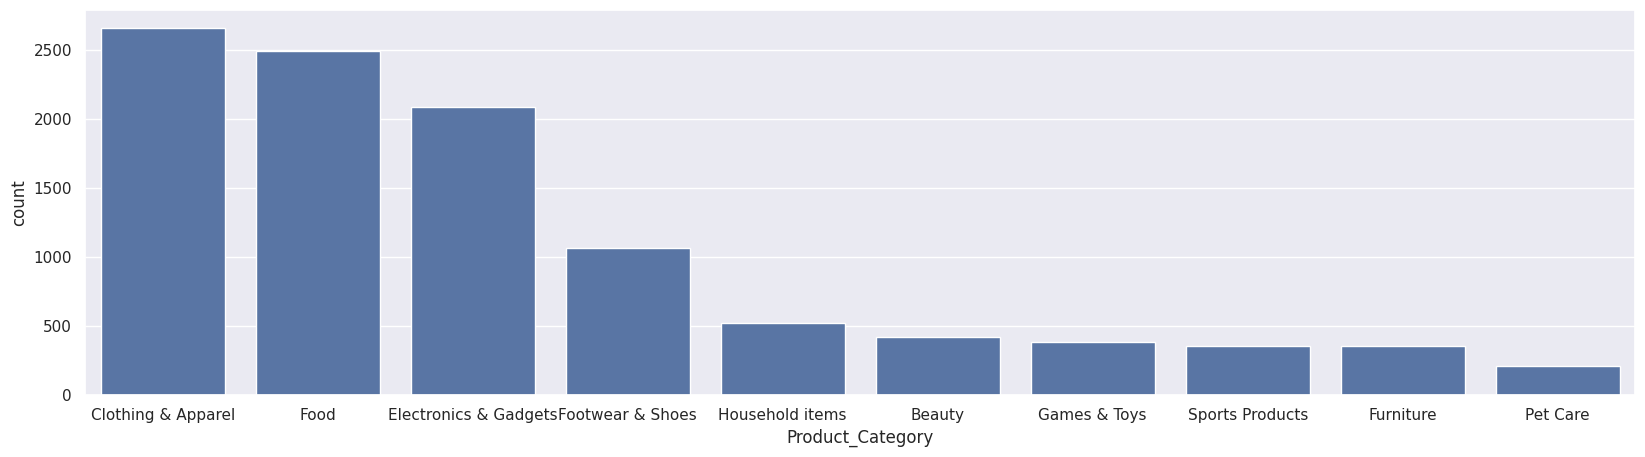

In [24]:

sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(data = df, x = 'Product_Category', order=df['Product_Category'].value_counts().nlargest(10).index)
plt.show()

## Q17. What is the prodct ID of the top 10 most sold products.

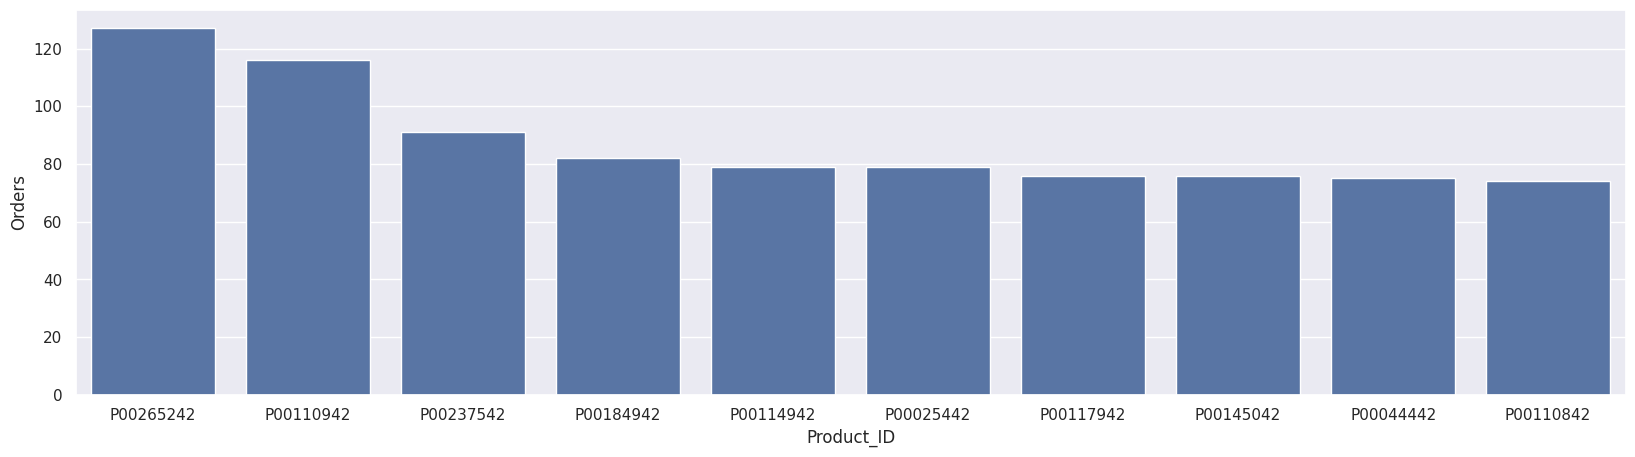

In [26]:

sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')
plt.show()

## Q18. What conclusion you can draw from the above visualizations.

In [38]:
## From the visualizations, we can draw several conclusions:
## - Females tend to purchase more than males, as shown by the gender vs total amount bar chart.
## - The age group 26-35 seems to be the most frequent buyers, especially females, based on the countplot for Age Group with hue and Gender.
## - Uttar Pradesh, Maharashtra, and Karnataka are the top 3 states in terms of both orders and sales amount.
## - Married people tend to spend more than unmarried people, according to the marital status plot.
## - The top 10 occupations contributing to sales are dominated by IT Sector, Healthcare, and Aviation.
## - Clothing, Food, and Electronics are the top 3 product categories.
## - Product ID P00110142 is the most sold product.
## - Overall, the data suggests that targeting married women in the age group of 26-35 in states like Uttar Pradesh, Maharashtra, and Karnataka, and promoting products in categories like Clothing, Food, and Electronics, especially the top-selling product IDs, could be effective marketing strategies during Diwali.